In [1]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Image Data Preprocessing

In this module, we will learn:

1. loading data using TensorFlow's libraries
2. 

***
## Exploring the Data

We have a folder that contains two subfolders: train and test. The train folder, further, contains two subfolder: cat (which contains the picture of cats) and dog(which containst the picture of dogs). Similarly, the test folder contains two subfolder: cat (which contains the picture of cats) and dog(which containst the picture of dogs). This is also shown in the following figure.

![Module3Pic1](Module3Pic1.png)

***

As a first step, we will creat the paths for each directory as shown in the below cell.

In [3]:
# The path of the main directory
current_dir = '/content/drive/MyDrive/BUITEMS/DeepLearning/Datasets/Cat_Dog_data/'

# The path of the train directory
train_dir = os.path.join(current_dir, 'train')

# The path of the test directory
test_dir = os.path.join(current_dir, 'test')

# The path of the dog directory inside train sub-directory
train_dir_dog = os.path.join(train_dir, 'dog')

# The path of the cat directory inside train sub-directory
train_dir_cat = os.path.join(train_dir, 'cat')

# The path of the dog directory inside test sub-directory
test_dir_dog = os.path.join(test_dir, 'dog')

# The path of the cat directory inside test sub-directory
test_dir_cat = os.path.join(test_dir, 'cat')

# creating a list (train_cat_image_names) which contains the names of cats' pictures in the train directory
train_cat_image_names = os.listdir(train_dir_cat)

# creating a list (train_dog_image_names) which contains the names of dogs' pictures in the train directory
train_dog_image_names = os.listdir(train_dir_dog)

In [4]:
print('There are {} dogs and {} cats in the training dataset.'.
      format(len(os.listdir(train_dir_dog)), len(os.listdir(train_dir_cat))))

print('There are {} dogs and {} cats in the testing dataset.'.
      format(len(os.listdir(test_dir_dog)), len(os.listdir(test_dir_cat))))

There are 274 dogs and 274 cats in the training dataset.
There are 88 dogs and 88 cats in the testing dataset.


***
## Loading Single Image Using `load_image` Method

We can load an image from a directory using `load_image` method as follows:




In [5]:
from tensorflow.keras.preprocessing.image import load_img
image_path = os.path.join(train_dir_cat, train_cat_image_names[0])
img = load_img(image_path)

The image 'img' in the above cell is of type PIL, we can display it, we can find its shape, we can convert to numpy array format or tensor format, and we can do a plenty of things with it.

The shape of image is (403, 499)


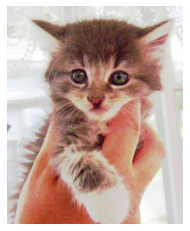

In [6]:
print('The shape of image is {}'.format(img.size))
img_array_format = tf.keras.preprocessing.image.img_to_array(img)
plt.imshow(img)
plt.axis('off')
plt.show()

***
The `load_image` function takes a number of arguments. For instance, 
We can see that the size of the image is (403, 499); we can give `target_size` as argument to resize the image on the run. Further, we can give another argument `color_mode` to remain it an RGB image or make it a grayscale image.
***

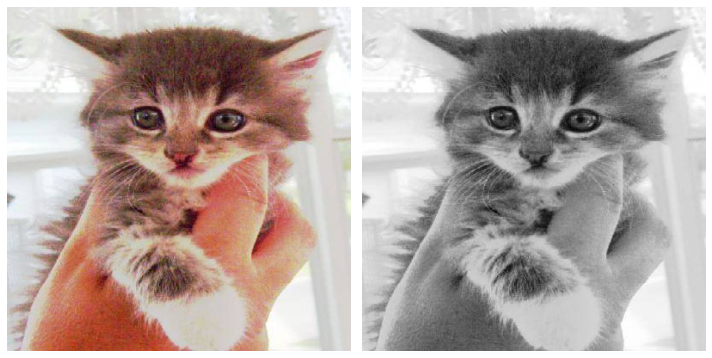

In [7]:
img = load_img(image_path,
               color_mode = 'rgb',
               target_size = (400,400))

img_gray = load_img(image_path,
                    color_mode = 'grayscale',
                    target_size = (400,400))

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

***
Though, we can see the color image (with three dimensions) and the grayscale image (with the dimension) int he above pictures, let's check their sizes for further confirmation.
***

In [8]:
print('The dimension of the color image is {}.\n'.format(img_to_array(img).shape))
print('The dimension of the grayscale image is {}.'.format(img_to_array(img_gray).shape))

The dimension of the color image is (400, 400, 3).

The dimension of the grayscale image is (400, 400, 1).


***
Let's load more than one images and display them.
***

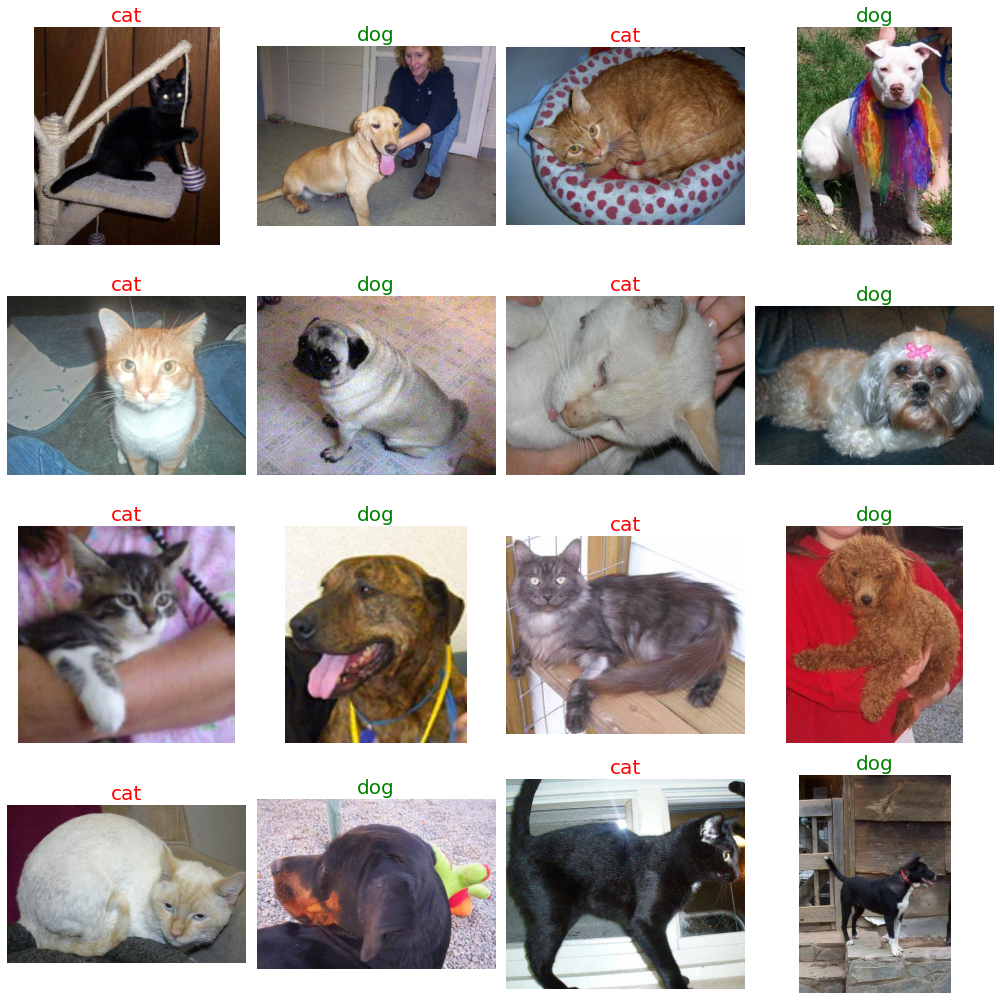

In [9]:
indices = np.random.randint(0, 274, size = 16, dtype = np.int16)
j = k = 0
plt.figure(figsize = (14, 14))
for i, index in enumerate(indices):
  plt.subplot(4,4,i+1+j)
  plt.imshow(tf.keras.preprocessing.image.load_img(
      os.path.join(train_dir_cat,
                   train_cat_image_names[index])))
  plt.title('cat', size = 20, color = 'red')
  plt.axis('off')
  plt.subplot(4,4,i+2+k)
  plt.imshow(tf.keras.preprocessing.image.load_img(
      os.path.join(train_dir_dog,
                   train_dog_image_names[index])))
  plt.title('dog',size = 20, color = 'green')
  plt.axis('off')
  k+=1
  j+=1
  if i == 7:
    break
plt.tight_layout()
plt.show()

***

***
## Loading Batches of Images Using `image_dataset_from_directory` Method

We can read eiher single or batches of images using `image_dataset_from_directory` method. It will return `BatchDataset` object, which will contain images and their labels. In the following cell, we will read a single image; we will do so by giving argument 'batch_size` a value of 1.

Found 548 files belonging to 2 classes.
There are only 32 image read.
The size of the image is (300, 300, 3).



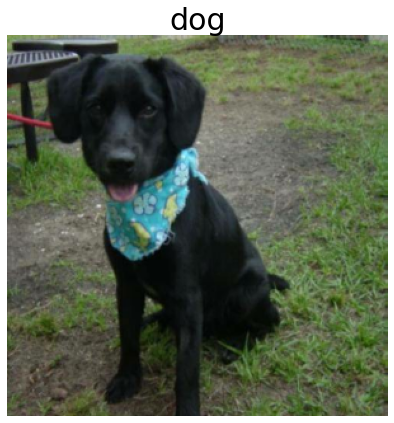

In [10]:

Image_and_Label = image_dataset_from_directory(directory=train_dir,
                                               image_size = (300,300),
                                               seed = 1)

# Let's display image and its corresponding label
plt.figure(figsize=(7,7))
for image, label in Image_and_Label.take(1):
  print('There are only {} image read.'.format(image.numpy().shape[0]))
  print('The size of the image is {}.\n'.format(image.numpy().shape[1:]))
  plt.imshow(image.numpy()[0,:,:,:].astype('uint8'))
  plt.title(Image_and_Label.class_names[label.numpy()[0]], fontsize = 30)
  plt.axis('off')

***
Let's read a batch of 32 images and dispaly them.
***

In [11]:
train_gen = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    # labels="inferred",
    # label_mode="binary",
    # class_names=['cat','dog'],
    # color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=32,
    # validation_split=0.15,
    # subset="validation",
    interpolation="bilinear",
    follow_links=False,
    # crop_to_aspect_ratio=False
    )



Found 548 files belonging to 2 classes.


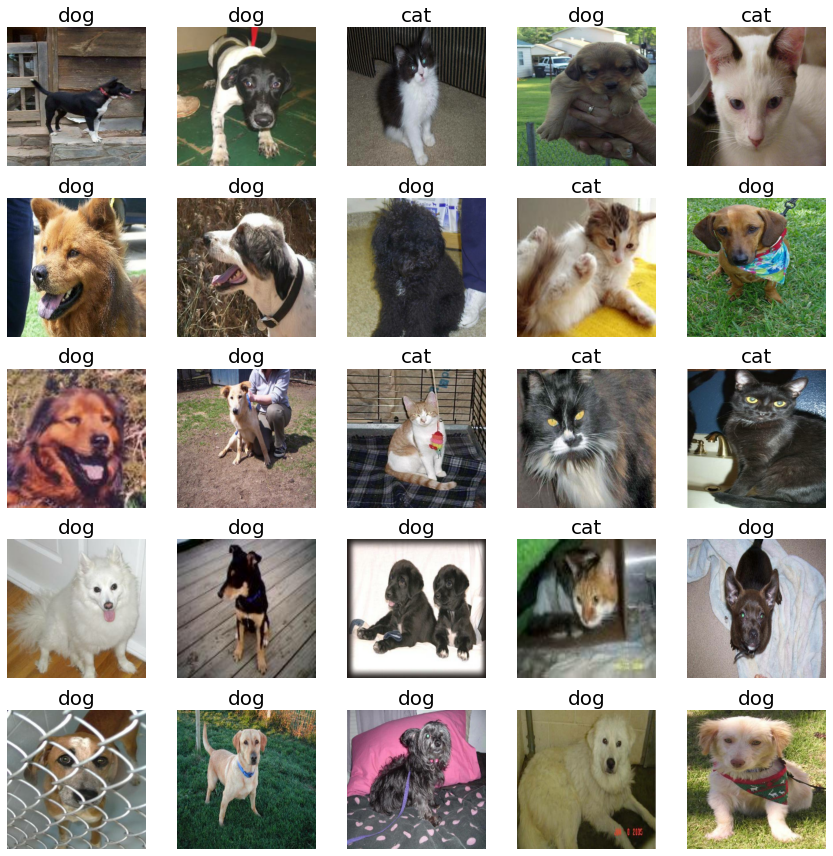

In [12]:
plt.figure(figsize=(12, 12))
class_names = train_gen.class_names
for images, labels in train_gen.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i,:,:,:].numpy().astype('uint8'))
    plt.title(class_names[labels.numpy()[i]], fontsize = 20)
    plt.axis("off")

plt.tight_layout()
plt.show()

***
Let's build a model and train it.

In [13]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 input_shape = (256, 256, 3), data_format = 'channels_last',
                 activation = 'relu'))

model.add(MaxPooling2D(3))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation = 'relu'))

model.add(Flatten())
model.add(Dense(units=150, activation='relu'))
model.add(Dense(units=1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 231200)            0         
_________________________________________________________________
dense (Dense)                (None, 150)               34680150  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 34,700,557
Trainable params: 34,700,557
Non-trainable params: 0
____________________________________________

In [14]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [15]:
model.fit(train_gen, epochs  = 10);

Epoch 1/10
18/18 [==============================] - 56s 1s/step - loss: 318.9221 - accuracy: 0.5036
Epoch 2/10
18/18 [==============================] - 2s 92ms/step - loss: 0.6547 - accuracy: 0.6971
Epoch 3/10
18/18 [==============================] - 2s 92ms/step - loss: 0.5273 - accuracy: 0.7701
Epoch 4/10
18/18 [==============================] - 2s 91ms/step - loss: 0.3855 - accuracy: 0.8157
Epoch 5/10
18/18 [==============================] - 2s 90ms/step - loss: 0.2831 - accuracy: 0.8631
Epoch 6/10
18/18 [==============================] - 2s 90ms/step - loss: 0.2060 - accuracy: 0.8996
Epoch 7/10
18/18 [==============================] - 2s 92ms/step - loss: 0.1381 - accuracy: 0.9507
Epoch 8/10
18/18 [==============================] - 2s 92ms/step - loss: 0.1342 - accuracy: 0.9526
Epoch 9/10
18/18 [==============================] - 2s 93ms/step - loss: 0.0974 - accuracy: 0.9690
Epoch 10/10
18/18 [==============================] - 2s 92ms/step - loss: 0.0799 - accuracy: 0.9635


In [16]:
test_gen = image_dataset_from_directory(
    directory = test_dir,
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=32)

Found 176 files belonging to 2 classes.


In [17]:
model.evaluate(test_gen)

6/6 [==============================] - 27s 65ms/step - loss: 3.0408 - accuracy: 0.5852


[3.0407934188842773, 0.5852272510528564]

## Loading Image Dataset Using `flow_from_directory` Method

### Standard Layout For DataSet

After you have collected your images, you must sort them first by dataset, such as train, test, and validation, and second by their class.

For example, imagine an image classification problem where we wish to classify photos of dogs and cats.

First, we have a **data/** directory where we will store all of the image data.

Next, we will have a **data/train/** directory for the training dataset and a **data/test/** for the holdout test dataset. We may also have a **data/validation/** for a validation dataset during training.

**Please note in this module, we have not created validation directory, but you can.**

So far, we have:

```
data/
data/train/
data/test/
```

Under each of the dataset directories, we will have subdirectories, one for each class where the actual image files will be placed.

For example, if we have a binary classification task for classifying photos of dogs and cats, we would have two classes, ‘dog‘ and ‘cat‘, and therefore two class directories under each dataset directory.

```
data/
data/train/
data/train/dog/
data/train/cat/
data/test/
data/test/dog/
data/test/cat/
```

Images of dogs will be placed inside dogs directory as shown below.

```
data/train/dog/dog_image1.jpg
data/train/dog/dog_image2.jpg
data/train/dog/dog_image3.jpg
...
data/train/cat/cat_image1.jpg
data/train/cat/cat_image2.jpg
data/train/cat/cat_image3.jpg
...
```

Please note that we require different photos in the train, test, and validation datasets.

***
The filenames used for the actual images often do not matter as we will load all images with given file extensions.

A good naming convention, if you have the ability to rename files consistently, is to use some name followed by a number with zero padding, e.g. image0001.jpg if you have thousands of images for a class.
***

Our dataset structure would like like the one shown below.

![Pic2](Module3Pic1.png)
***

### How to Progressively Load Images

To load image data, we can use the `ImageDataGenerator` class provided by Keras.

The main benefit of using this class to load the data is that images are loaded for a single dataset in batches, meaning that it can be used for loading both small datasets as well as very large image datasets with thousands or millions of images.

Instead of loading all images into memory, it will load just enough images into memory for the current and perhaps the next few mini-batches when training and evaluating a deep learning model. This can be referred as progressive loading, as the dataset is progressively loaded from file, retrieving just enough data for what is needed immediately.

Two additional benefits of the using the `ImageDataGenerator` class is that it can also automatically scale pixel values of images and it can automatically generate augmented versions of images. 

The pattern for using the `ImageDataGenerator` class is used as follows:

1. Construct and configure an instance of the `ImageDataGenerator` class.
2. Retrieve an iterator by calling the `flow_from_directory()` function.
3. Use the iterator in the training or evaluation of a model.

***


#### Construct and configure an instance of the `ImageDataGenerator` class.

The constructor for the `ImageDataGenerator` contains many arguments to specify how to manipulate the image data after it is loaded, including pixel scaling and data augmentation as shown in the following snippet.
```
tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs
)
```




In [24]:
train_datagenerator = ImageDataGenerator(rescale = 1./255)
test_datagenerator = ImageDataGenerator(rescale = 1./255)

***
#### Retrieve an iterator by calling the `flow_from_directory()` function

***
After instantiating the `ImageDataGenerator`, an iterator is required to progressively load images for a single dataset.

This requires calling the `flow_from_directory()` function and specifying the dataset directory, such as the train, test, or validation directory.

The function also allows you to configure more details related to the loading of images. Of note is the **`target_size`** argument that allows you to load all images to a specific size, which is often required when modeling. The function defaults to square images with the size $(256, 256)$.

The function also allows you to specify the type of classification task via the **`class_mode`** argument, specifically whether it is **binary** or a multi-class classification **categorical**.

The default **`batch_size`** is $32$, which means that 32 randomly selected images from across the classes in the dataset will be returned in each batch when training. Larger or smaller batches may be desired. You may also want to return batches in a deterministic order when evaluating a model, which you can do by setting **`shuffle`** to **`False`**.

There are many other options, and you are encouraged to review the [API documentation](https://keras.io/api/preprocessing/image/).

We can use the same `ImageDataGenerator` to prepare separate iterators for separate dataset directories. This is useful if we would like the same pixel scaling applied to multiple datasets (e.g. trian, test, etc.).

In [25]:
train_it = train_datagenerator.flow_from_directory(
    directory = train_dir,
    target_size = (256, 256),
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True
)

test_it = test_datagenerator.flow_from_directory(
    directory = test_dir,
    target_size = (256, 256),
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True
)

Found 548 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


***
#### Use the iterator in the training or evaluation of a model

Once the iterators have been prepared, we can use them when fitting and evaluating a deep learning model.

For example, fitting a model with a data generator can be achieved by calling the `fit()` function on the model and passing the training iterator. The validation iterator can be specified when calling this function via the **`validation_data`** argument.

The **`steps_per_epoch`** argument must be specified for the training iterator in order to define how many batches of images defines a single epoch.

For example, if you have $1,000$ images in the training dataset (across all classes) and a batch size of $64$, then the **`steps_per_epoch`** would be about $16$, or $\frac{1000}{64}$.

Similarly, if a validation iterator is applied, then the **`validation_steps`** argument must also be specified to indicate the number of batches in the validation dataset defining one epoch.



In [26]:
history = model.fit(train_it, epochs=30, steps_per_epoch=548/32)

Epoch 1/30
17/17 [==============================] - 3s 150ms/step - loss: 0.6107 - accuracy: 0.7646
Epoch 2/30
17/17 [==============================] - 3s 148ms/step - loss: 0.5732 - accuracy: 0.8193
Epoch 3/30
17/17 [==============================] - 3s 148ms/step - loss: 0.4527 - accuracy: 0.8175
Epoch 4/30
17/17 [==============================] - 3s 157ms/step - loss: 0.3712 - accuracy: 0.9051
Epoch 5/30
17/17 [==============================] - 3s 159ms/step - loss: 0.2835 - accuracy: 0.9088
Epoch 6/30
17/17 [==============================] - 3s 156ms/step - loss: 0.2131 - accuracy: 0.9617
Epoch 7/30
17/17 [==============================] - 3s 157ms/step - loss: 0.1447 - accuracy: 0.9653
Epoch 8/30
17/17 [==============================] - 3s 156ms/step - loss: 0.0959 - accuracy: 0.9891
Epoch 9/30
17/17 [==============================] - 3s 157ms/step - loss: 0.0597 - accuracy: 0.9982
Epoch 10/30
17/17 [==============================] - 3s 154ms/step - loss: 0.0448 - accuracy: 0.9982

In [28]:
model.evaluate(test_it, verbose=1);

6/6 [==============================] - 1s 135ms/step - loss: 1.8970 - accuracy: 0.6250


# References

1. [How to Load Large Datasets From Directories for Deep Learning in Keras](https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/)
2. [How to Configure Image Data Augmentation in Keras](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)
3. [Image data preprocessing](https://keras.io/api/preprocessing/image/#flow-methodx)
4. [Image classification from scratch](https://keras.io/examples/vision/image_classification_from_scratch/)